In [19]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
from classy import Class
from scipy.optimize import fsolve
from math import pi

In [20]:
#import the data needed to resolve the problem (EXERCISE 03)
data04 = open("TFG04.dat", "r")

#add the data to different lists
l_exp04 = np.array([])
tCl_exp04 = np.array([])
for line in data04.readlines():
    lista = line.split()
    l_exp04 = np.append(l_exp04, float(lista[0]))
    tCl_exp04 = np.append(tCl_exp04, float(lista[1]))


In [21]:
# Variable wished to determine
var_name = ['h','N_ur']
var_array = [np.linspace(0.533,0.547,15), np.linspace(3.20,3.34,15)]
var_num = [len(var_array[0]), len(var_array[1])]
var_legend = [r'$h$', r'$N_{eff}$']
var_figname = ['h', 'N_eff']

# Fixed settings
common_settings = {# LambdaCDM parameters
                   'recombination': 'RECFAST',
                   'T_cmb':2.7,
                   'omega_b':0.022,
                   'omega_cdm':0.132,
                   'A_s':2.2e-9,
                   'n_s':0.965,
                   'z_reio':11.357,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl,mPk',
                   }

#Other variables
twopi = 2.*pi

# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [22]:
#Deviation of data
chi2 = np.empty([var_num[0],var_num[1]])

M = Class()
# loop over varying parameter values
for i,var0 in enumerate(var_array[0]):
    print (' * Compute with %s=%f'%(var_name[0],var0))

    for j,var1 in enumerate(var_array[1]):
        print ('\t * Compute with %s=%f'%(var_name[1],var1))
        # call CLASS
        M.set(common_settings)
        M.set({var_name[0]:var0,
               var_name[1]:var1})
        M.compute()

        # get Cls
        clM = M.raw_cl(2500)
        ll = clM['ell'][2:]
        clTT = clM['tt'][2:]
        clEE = clM['ee'][2:]
        clPP = clM['pp'][2:]

        tCl = clTT*ll*(ll+1)/twopi

        #Sum over the deviation of cl
        chi2[i][j] = sum((tCl-tCl_exp04)*(tCl-tCl_exp04))

        # reset CLASS
        M.empty()

 * Compute with h=0.533000
	 * Compute with N_ur=3.200000
	 * Compute with N_ur=3.210000
	 * Compute with N_ur=3.220000
	 * Compute with N_ur=3.230000
	 * Compute with N_ur=3.240000
	 * Compute with N_ur=3.250000
	 * Compute with N_ur=3.260000
	 * Compute with N_ur=3.270000
	 * Compute with N_ur=3.280000
	 * Compute with N_ur=3.290000
	 * Compute with N_ur=3.300000
	 * Compute with N_ur=3.310000
	 * Compute with N_ur=3.320000
	 * Compute with N_ur=3.330000
	 * Compute with N_ur=3.340000
 * Compute with h=0.534000
	 * Compute with N_ur=3.200000
	 * Compute with N_ur=3.210000
	 * Compute with N_ur=3.220000
	 * Compute with N_ur=3.230000
	 * Compute with N_ur=3.240000
	 * Compute with N_ur=3.250000
	 * Compute with N_ur=3.260000
	 * Compute with N_ur=3.270000
	 * Compute with N_ur=3.280000
	 * Compute with N_ur=3.290000
	 * Compute with N_ur=3.300000
	 * Compute with N_ur=3.310000
	 * Compute with N_ur=3.320000
	 * Compute with N_ur=3.330000
	 * Compute with N_ur=3.340000
 * Compute with 

In [23]:
#calculate chi2 minimum
min_chi2 = []
for i,chi2_var in enumerate(chi2):
    min_chi2.append(min(chi2_var))

#output value for h and N_eff minimum
var_min_index = np.array(np.where(chi2 == min(min_chi2)), dtype=int)
var_min0 = var_array[0][var_min_index[0][0]]
var_min1 = var_array[1][var_min_index[1][0]]

print('Experimental value of', var_name[0], '=', var_min0, '\n'
      'Experimental value of', var_name[1], '=', np.round(var_min1,3))

Experimental value of h = 0.54 
Experimental value of N_ur = 3.27


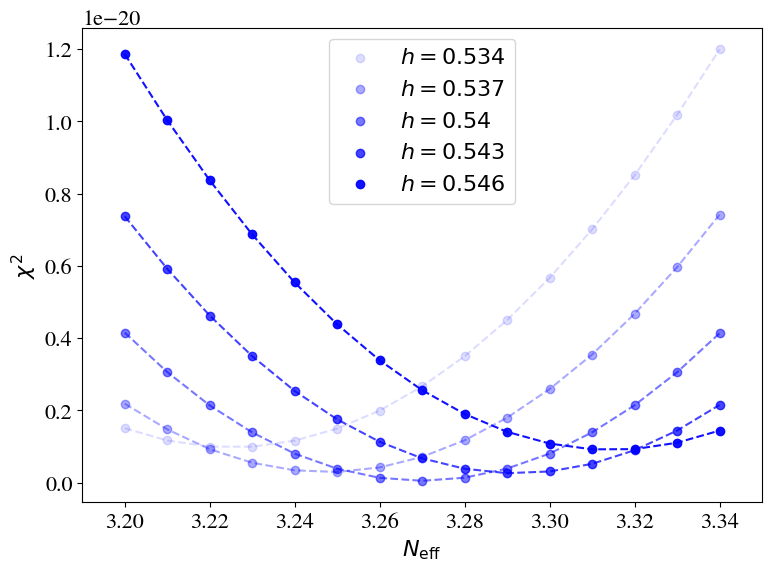

In [24]:
#Error figure
fig1_err, ax1_err = plt.subplots()

#plot chi2 error varying h
for i in range(1,var_num[0],3):
    chi2_var = []
    for j in range(0,var_num[1]):
        chi2_var.append(chi2[i][j])
    ax1_err.scatter(var_array[1], chi2_var, color='b', 
                alpha = 1*(i+1)/len(var_array[0]), label=r'$h =%s$'%str(np.round(var_array[0][i],3)))
    ax1_err.plot(var_array[1], chi2_var, color='b', linestyle = '--', alpha = 1*(i+1)/len(var_array[0]))

# output chi2 error figure
ax1_err.set_xlim([3.19,3.35])
ax1_err.set_xlabel(r'$N_\mathrm{eff}$')
ax1_err.set_ylabel(r'$\chi^2$')
ax1_err.legend()
fig1_err.tight_layout()
fig1_err.savefig('TFG04.1.png')

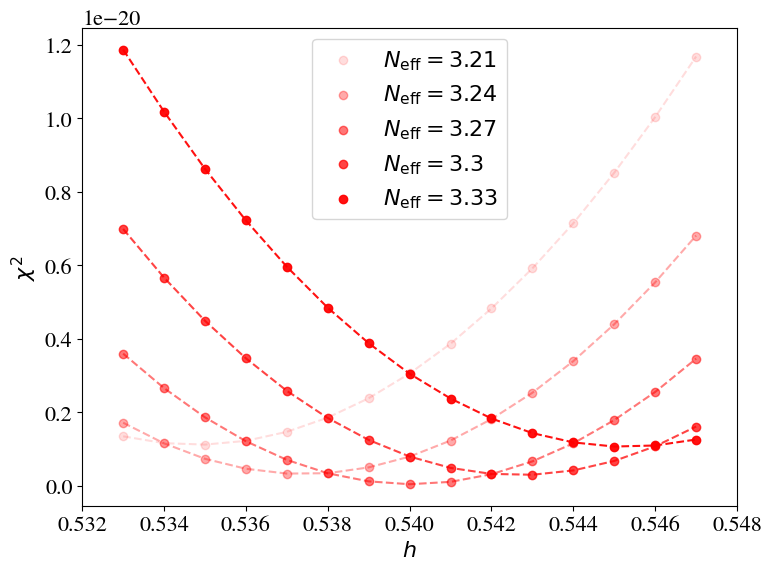

In [29]:
#Error figure
fig2_err, ax2_err = plt.subplots()

#plot chi2 error varying N_eff
for i in range(1,var_num[1],3):
    chi2_var = []
    for j in range(0,var_num[0]):
        chi2_var.append(chi2[j][i])
    ax2_err.scatter(var_array[0], chi2_var, color='r', 
                alpha = 1*(i+1)/len(var_array[0]), label=r'$N_\mathrm{eff} =%s$'%str(np.round(var_array[1][i],3)))
    ax2_err.plot(var_array[0], chi2_var, color='r', linestyle = '--', alpha = 1*(i+1)/len(var_array[0]))

# output chi2 error figure
ax2_err.set_xlim([0.532,0.548])
ax2_err.set_xlabel(r'$h$')
ax2_err.set_ylabel(r'$\chi^2$')
ax2_err.legend()
fig2_err.tight_layout()
fig2_err.savefig('TFG04.2.png')

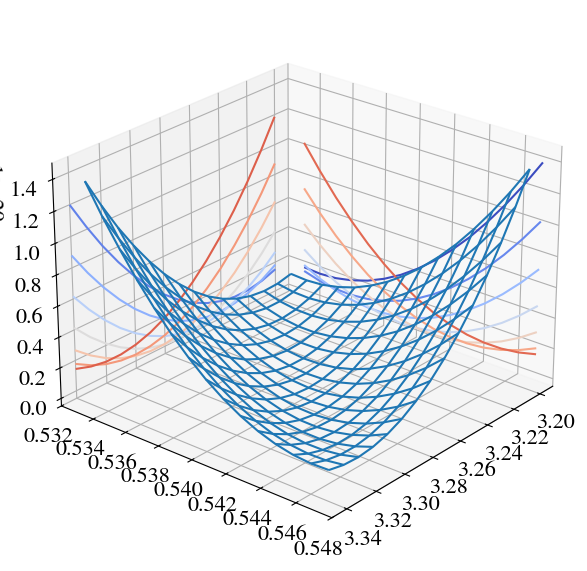

In [35]:
#Error figure in 3D
fig_3d = plt.figure()
ax_3d = fig_3d.add_subplot(projection = '3d')

#meshgrid for 3d plotting
x,y = np.meshgrid(var_array[1], var_array[0])

#plot 3d chi2 error
ax_3d.plot_wireframe(x, y, chi2)
ax_3d.contour(x,y,chi2, zdir='x', offset=3.19, cmap='coolwarm')
ax_3d.contour(x,y,chi2, zdir='y', offset=0.532, cmap='coolwarm')

#output of figure in 3D
ax_3d.view_init(elev=25, azim=40, roll=0)
ax_3d.set_ylim([0.532,0.548])
ax_3d.set_xlim([3.19,3.35])
ax_3d.set_zlim([-0.5e-21,1.5e-20])
fig_3d.tight_layout()
fig_3d.savefig('TFG04.3.png')